In [47]:
## Import the librarerys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
## Load the Data set

In [4]:
data=pd.read_csv("C:/Users/Dayakar Reddy Sura/Downloads/Titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.shape

(891, 12)

In [13]:
data[data.duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [49]:
## In this no duplicate values

In [50]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
## Here have null values in Age,Cabin and Embarked
## High null values in Cabin

In [52]:
data1=data.copy()

In [16]:
data2=data1.drop(['PassengerId','Name','Cabin','SibSp','Ticket'],axis=1)

In [53]:
### Dropping the columns 
## No need for the model for these columns and the cabin have almost all null values 

In [17]:
data2.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S


<Axes: >

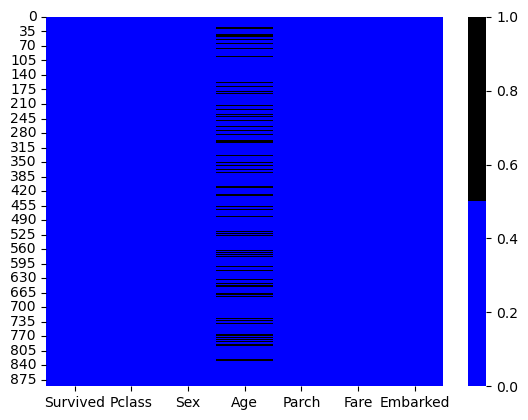

In [21]:
cols = data2.columns
colors=['Blue','Black']
sns.heatmap(data2[cols].isnull(),cmap=sns.color_palette(colors))

In [54]:
### Imputing the null values using mean for Age and mode for Embarked

In [22]:
data2['Age']=data2.Age.fillna(data2['Age'].mean())
data2['Embarked']=data2.Embarked.fillna(data2['Embarked'].mode()[0])

In [23]:
data2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
data2.describe()

,Survived,Pclass,Age,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.381594,32.204208
std,0.486592,0.836071,13.002015,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,14.454200
75%,1.000000,3.000000,35.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,6.000000,512.329200


In [55]:
# counts how many classes in Pclass

In [25]:
data2.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [27]:
data2.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [29]:
data2.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [30]:
data2.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
## Visulize the bar plot 

<Axes: >

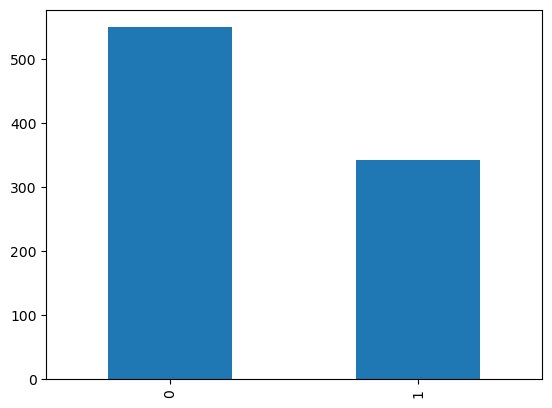

In [31]:
data2['Survived'].value_counts().plot(kind='bar')

<Axes: >

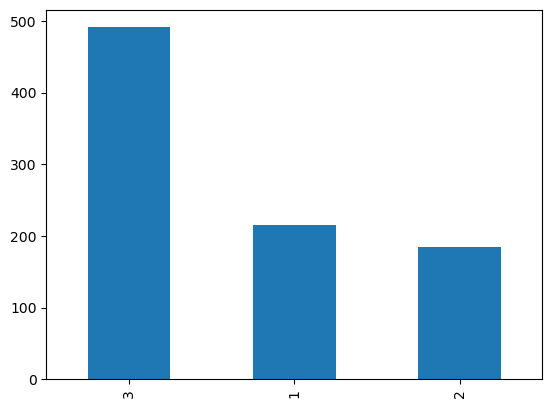

In [33]:
data2['Pclass'].value_counts().plot(kind='bar')

<Axes: >

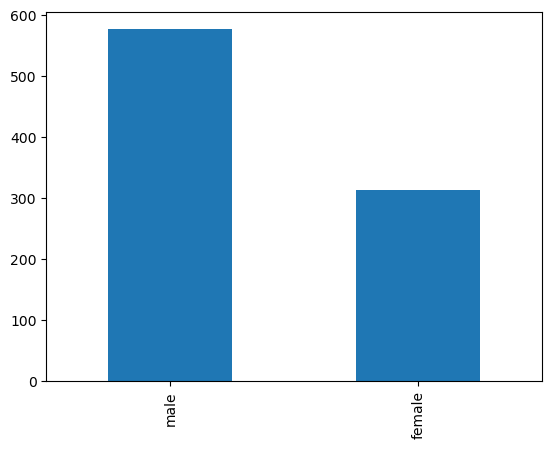

In [34]:
data2['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

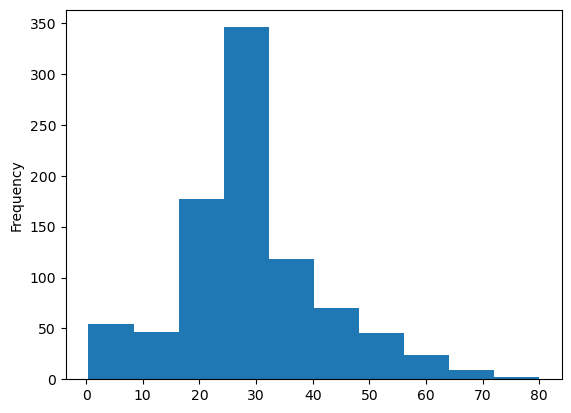

In [35]:
data2.Age.plot(kind='hist')

<Axes: >

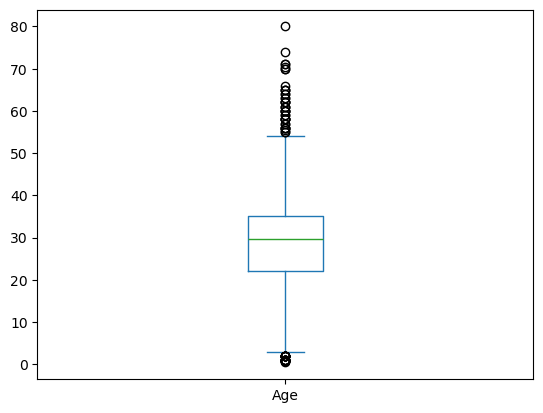

In [36]:
data2.Age.plot(kind='box')

In [57]:
## In Age column have lot of outliers

<Axes: >

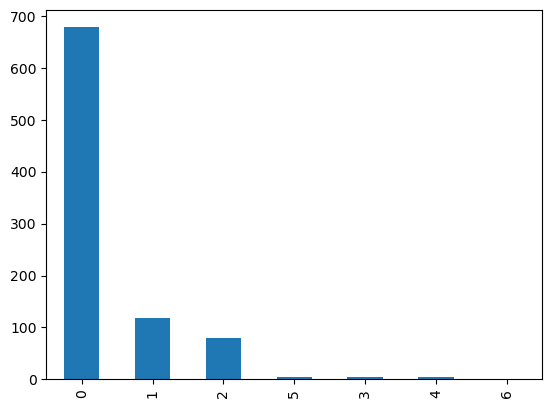

In [37]:
data2['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

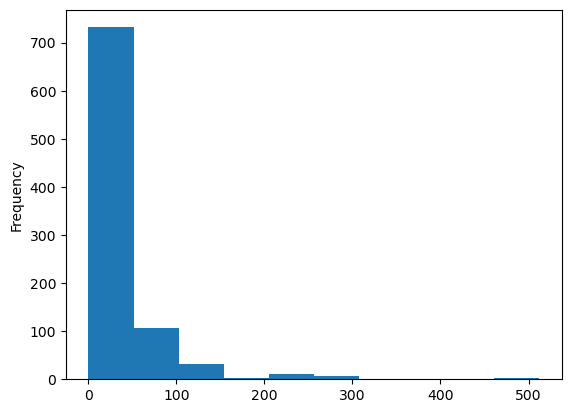

In [38]:
data2.Fare.plot(kind='hist')

<Axes: >

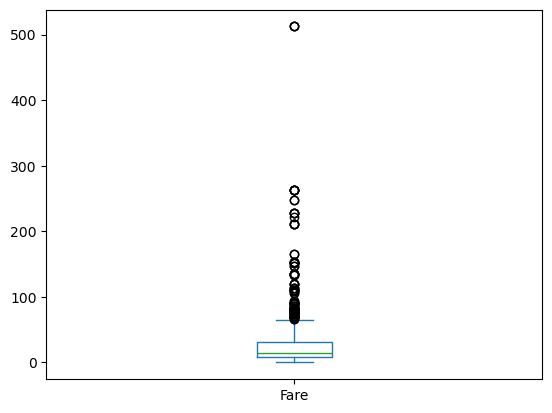

In [39]:
data2.Fare.plot(kind='box')

In [58]:
### fare also have lots of Outliers

<Axes: >

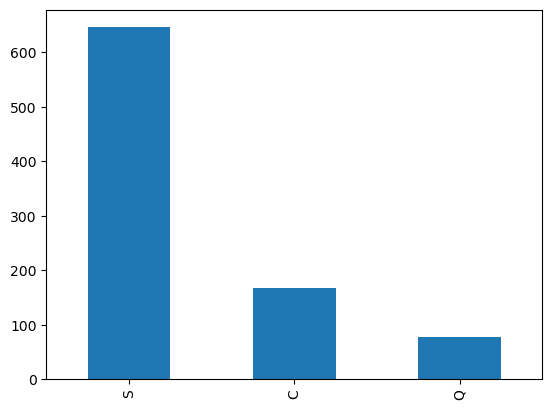

In [41]:
data2['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

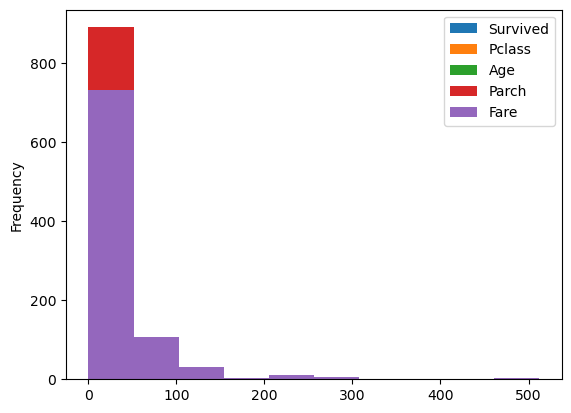

In [42]:
data2.plot(kind='hist')

<Axes: >

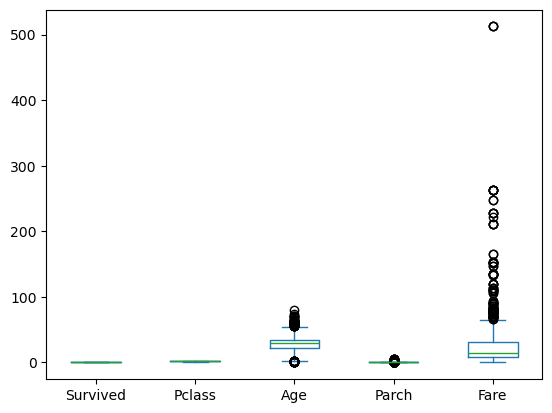

In [43]:
data2.plot(kind='box')

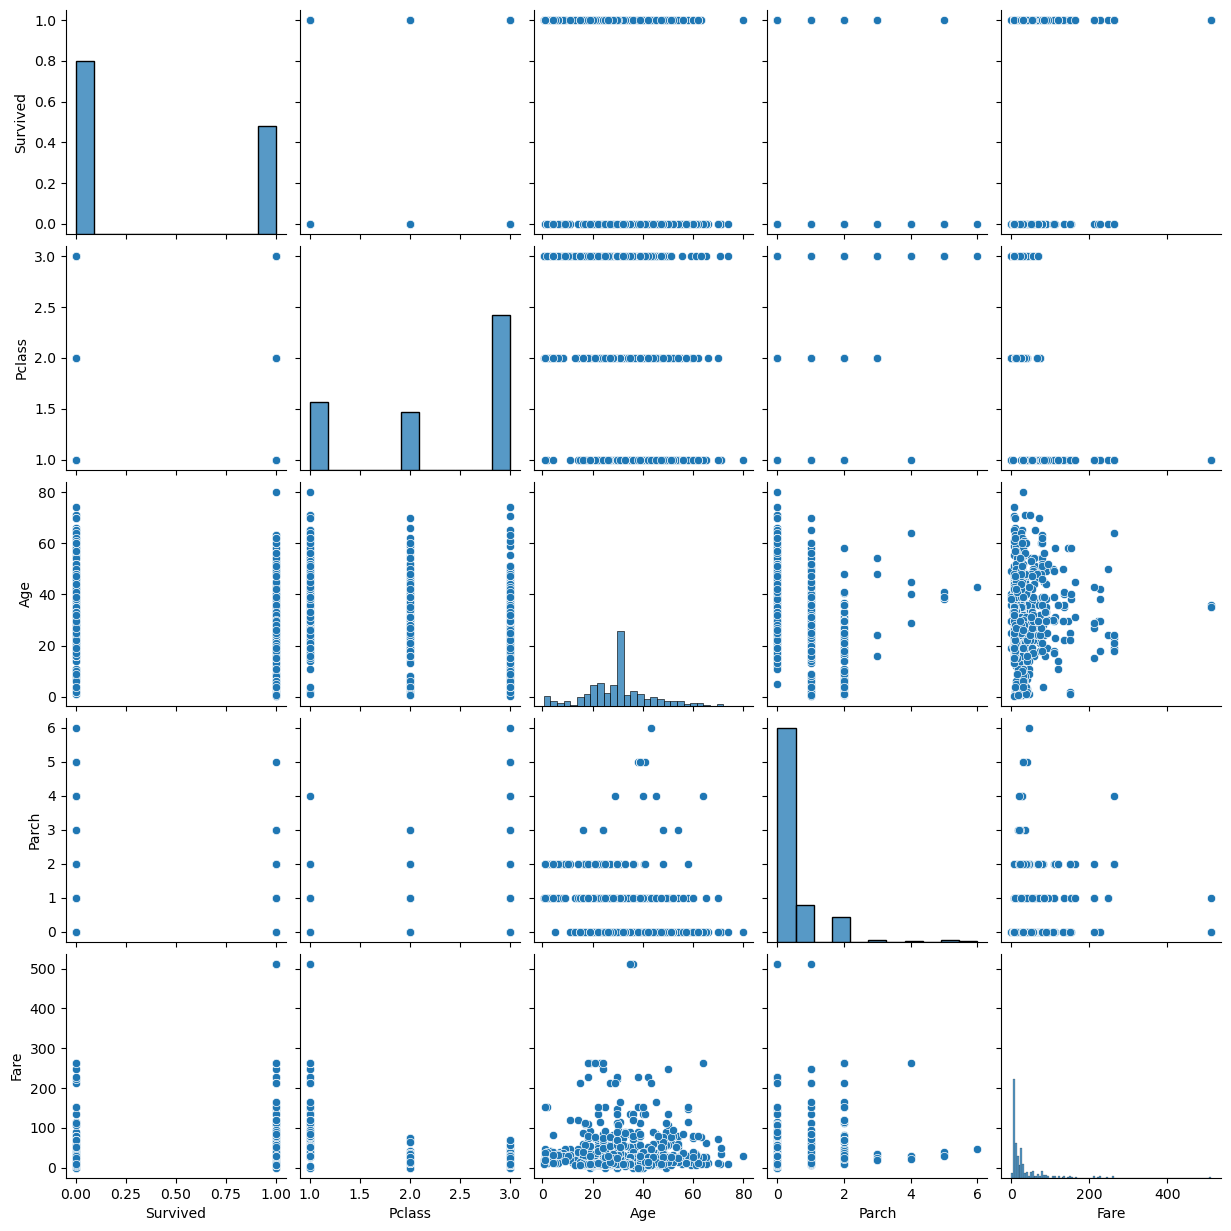

In [46]:
sns.pairplot(data2)

In [45]:
data3=pd.get_dummies(data2)
data3.head()

,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,0,7.2500,0,1,0,0,1
1,1,1,38.0,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,7.9250,1,0,0,0,1
3,1,1,35.0,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,8.0500,0,1,0,0,1


In [59]:
## Using One-hot encoding

### XGBOOST

In [60]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 653.6 kB/s eta 0:03:12
   ---------------------------------------- 0.1/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.1/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.2/124.9 MB 871.5 kB/s eta 0:02:24
   ---------------------------------------- 0.4/124.9 MB 1.4 MB/s eta 0:01:30
   ---------------------------------------- 0.7/124.9 MB 2.4 MB/s eta 0:00:51
   ---------------------------------------- 1.1/124.9 MB 3.2 MB/s eta 0:00:40
   ---------------------------------------- 1.4/124.9 MB 3.6 MB/s eta 0:00:35
    --------------------------------------- 1.9/124.9 MB 4.4 MB/s eta 0:00:29
    --------------------------------------- 2.4/124.9 MB 5.0 MB/s eta 0:00:25
    --------------------------------------- 2.9/124.9 MB 5.4 MB/s eta 0:00

In [63]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
array=data3.values
x=array[:,1:]
y=array[:,0]

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [66]:
model=XGBClassifier(n_estimator=40)
model.fit(x,y)

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:51:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=40, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [67]:
y_pred=model.predict(x)
np.mean(y_pred == y)

0.9618406285072951

In [70]:
test_pred=model.predict(x_test)
np.mean(test_pred == y_test)

0.9664804469273743

In [71]:
accuracy=accuracy_score(y,y_pred)
print("Accuracy:%2f%%"%(accuracy*100))

Accuracy:96.184063%


##### Here the The train and test almost equal.it is good model and not a Overfit model

In [72]:
model2=XGBClassifier(n_estimator=40)
model2.fit(x_train,y_train)

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:02:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=40, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [74]:
y_pred1=model2.predict(x)
np.mean(y_pred1 == y)

0.936026936026936

In [75]:
test_pred1=model2.predict(x_test)
np.mean(test_pred1 == y_test)

0.8156424581005587

In [76]:
accuracy=accuracy_score(y,y_pred1)
print("Accuracy:%2f%%"%(accuracy*100))

Accuracy:93.602694%


##### Here the train accuracy is more then the test accuracy ,so this model is Overfit

In [78]:
model3=XGBClassifier(n_estimator=40,max_depth=4)
model3.fit(x_train,y_train)

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:11:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=40, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [79]:
y_pred2=model3.predict(x)
np.mean(y_pred2 == y)

0.920314253647587

In [80]:
test_pred2=model3.predict(x_test)
np.mean(test_pred2 == y_test)

0.8212290502793296

In [83]:
model4=XGBClassifier(n_estimator=40,max_depth=5)
model4.fit(x_train,y_train)

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:13:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=40, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [84]:
y_pred3=model4.predict(x)
np.mean(y_pred3 == y)

0.9304152637485971

In [85]:
test_pred3=model4.predict(x_test)
np.mean(test_pred3 == y_test)

0.8044692737430168

#### LGBM

In [86]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB 3.9 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 8.3 MB/s eta 0:00:00


In [87]:
import lightgbm as lgbm

In [92]:
model_lg=lgbm.Dataset(x,y)
model_lg

In [95]:
params={}
params['learning_rate']=0.1
params['boosting_type']='gbdt'
params['objective']='binary'
params['metric']='binary_logloss'
params['sub_feature']=0.4
params['num_leaves']=10
params['min_data']=100
params['max_depth']=4
params

{'learning_rate': 0.1,
 'boosting_type': 'gbdt',
 'objective': 'binary',
 'metric': 'binary_logloss',
 'sub_feature': 0.4,
 'num_leaves': 10,
 'min_data': 100,
 'max_depth': 4}

In [97]:
clf=lgbm.train(params,model_lg,1500)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [98]:
y_predlg=clf.predict(x)
y_predlg

array([0.08092558, 0.9949647 , 0.47915199, 0.99918403, 0.11053516,
       0.09228336, 0.12608408, 0.24520637, 0.51879251, 0.99182369,
       0.81570714, 0.98365364, 0.09409188, 0.03358652, 0.80229835,
       0.85860074, 0.04321549, 0.15036024, 0.5515591 , 0.77823737,
       0.06816545, 0.22330067, 0.74826863, 0.25835768, 0.29969976,
       0.27961501, 0.12665275, 0.20674889, 0.81880435, 0.01563699,
       0.12475489, 0.99415926, 0.79177743, 0.06236897, 0.34378263,
       0.37186699, 0.12665275, 0.04436997, 0.23123747, 0.93013512,
       0.35380929, 0.80717546, 0.06171561, 0.96986524, 0.85227001,
       0.08491646, 0.16822571, 0.79177743, 0.34577974, 0.23123747,
       0.06022801, 0.07153529, 0.98758516, 0.90980564, 0.23374659,
       0.30101387, 0.6815101 , 0.3104043 , 0.95845645, 0.05210093,
       0.25743636, 0.99116495, 0.28136742, 0.07982775, 0.22001   ,
       0.42637124, 0.93509836, 0.18758392, 0.66699891, 0.085319  ,
       0.33069305, 0.04107963, 0.01271614, 0.07164364, 0.85047

In [99]:
predictions=[round(value) for value in y_predlg]
predictions

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,


In [102]:
accuracylg=accuracy_score(y,predictions)
print("Accuracy:%2f%%"%(accuracylg*100))

Accuracy:88.664422%


In [103]:
model_lg1=lgbm.Dataset(x_train,y_train)
model_lg1

In [104]:
params1={}
params1['learning_rate']=0.1
params1['boosting_type']='gbdt'
params1['objective']='binary'
params1['metric']='binary_logloss'
params1['sub_feature']=0.4
params1['num_leaves']=10
params1['min_data']=100
params1['max_depth']=4
params1

{'learning_rate': 0.1,
 'boosting_type': 'gbdt',
 'objective': 'binary',
 'metric': 'binary_logloss',
 'sub_feature': 0.4,
 'num_leaves': 10,
 'min_data': 100,
 'max_depth': 4}

In [105]:
clf1=lgbm.train(params1,model_lg1,1500)

[LightGBM] [Info] Number of positive: 274, number of negative: 438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384831 -> initscore=-0.469091
[LightGBM] [Info] Start training from score -0.469091
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [107]:
y_predlg1=clf1.predict(x_train)
y_predlg1

array([0.98552219, 0.98418898, 0.81003598, 0.08301564, 0.08421926,
       0.98585113, 0.22555876, 0.99684454, 0.05740084, 0.45970047,
       0.01636966, 0.07526986, 0.26624904, 0.01210353, 0.04294469,
       0.1541547 , 0.14137335, 0.06311085, 0.99106297, 0.07504819,
       0.0380446 , 0.76188961, 0.08762496, 0.07504819, 0.03044202,
       0.09884332, 0.86875921, 0.01797988, 0.05538635, 0.03234488,
       0.06311085, 0.09200251, 0.06695322, 0.90943462, 0.14318373,
       0.11968235, 0.10030143, 0.52860712, 0.02806702, 0.03036585,
       0.09804169, 0.53151684, 0.67340924, 0.86563347, 0.44421113,
       0.98695539, 0.93755688, 0.62037462, 0.55151151, 0.77165439,
       0.05740084, 0.94489719, 0.07498059, 0.35696785, 0.0179002 ,
       0.20510351, 0.02974392, 0.08474828, 0.02020182, 0.46229563,
       0.57389552, 0.04132486, 0.95087568, 0.09587483, 0.86780667,
       0.06311085, 0.38490553, 0.03324016, 0.94059105, 0.46039067,
       0.04856456, 0.11310537, 0.39956234, 0.06311085, 0.30363

In [108]:
predictions1=[round(value) for value in y_predlg1]
predictions1

[1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,


In [111]:
accuracylg1=accuracy_score(y_train,predictions1)
print("Accuracy:%2f%%"%(accuracylg1*100))

Accuracy:88.623596%


In [112]:
model_lg2=lgbm.Dataset(x_train,y_train)
model_lg2

In [113]:
params2={}
params2['learning_rate']=0.2
params2['boosting_type']='gbdt'
params2['objective']='binary'
params2['metric']='binary_logloss'
params2['sub_feature']=0.6
params2['num_leaves']=8
params2['min_data']=150
params2['max_depth']=5
params2

{'learning_rate': 0.2,
 'boosting_type': 'gbdt',
 'objective': 'binary',
 'metric': 'binary_logloss',
 'sub_feature': 0.6,
 'num_leaves': 8,
 'min_data': 150,
 'max_depth': 5}

In [114]:
clf2=lgbm.train(params2,model_lg2,1500)

[LightGBM] [Info] Number of positive: 274, number of negative: 438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384831 -> initscore=-0.469091
[LightGBM] [Info] Start training from score -0.469091
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [115]:
y_predlg2=clf2.predict(x_train)
y_predlg2

array([0.9954504 , 0.99188064, 0.85200809, 0.04893071, 0.09026655,
       0.97080639, 0.21580939, 0.99646735, 0.0603326 , 0.3731236 ,
       0.01806301, 0.06476855, 0.50301853, 0.03662431, 0.03596373,
       0.1488334 , 0.12046143, 0.12046143, 0.99202973, 0.04548665,
       0.04745865, 0.73847355, 0.09273982, 0.04548665, 0.03697913,
       0.18362294, 0.95013957, 0.01886064, 0.02763779, 0.0339852 ,
       0.12046143, 0.14072262, 0.15600778, 0.96345949, 0.10314678,
       0.04927972, 0.1564901 , 0.61244298, 0.03662431, 0.03285671,
       0.3838542 , 0.64915352, 0.64440815, 0.94895351, 0.4212532 ,
       0.98819244, 0.93441684, 0.62240005, 0.50719189, 0.751359  ,
       0.0603326 , 0.96802846, 0.04266313, 0.4089355 , 0.01447179,
       0.12039126, 0.03484028, 0.05809384, 0.02075487, 0.31208653,
       0.49197997, 0.06846914, 0.976416  , 0.09371031, 0.73088021,
       0.12046143, 0.26206701, 0.03510233, 0.97201462, 0.52682377,
       0.05861676, 0.04102794, 0.34896248, 0.12046143, 0.27392

In [116]:
predictions2=[round(value) for value in y_predlg2]
predictions2

[1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,


In [117]:
accuracylg2=accuracy_score(y_train,predictions2)
print("Accuracy:%2f%%"%(accuracylg2*100))

Accuracy:86.797753%


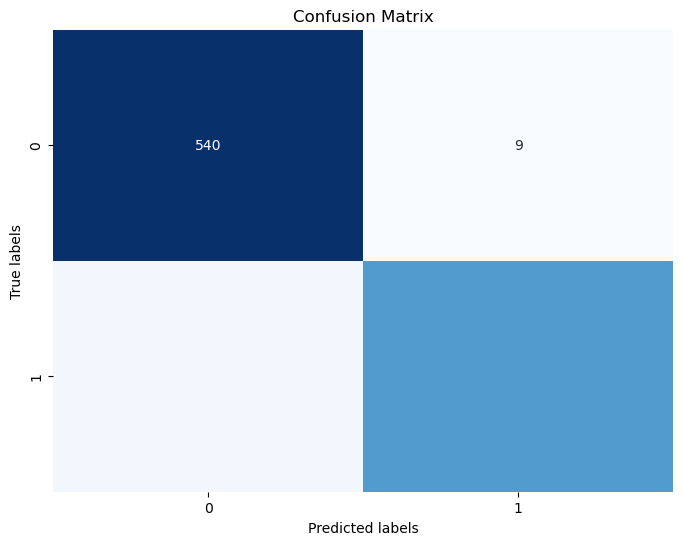

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

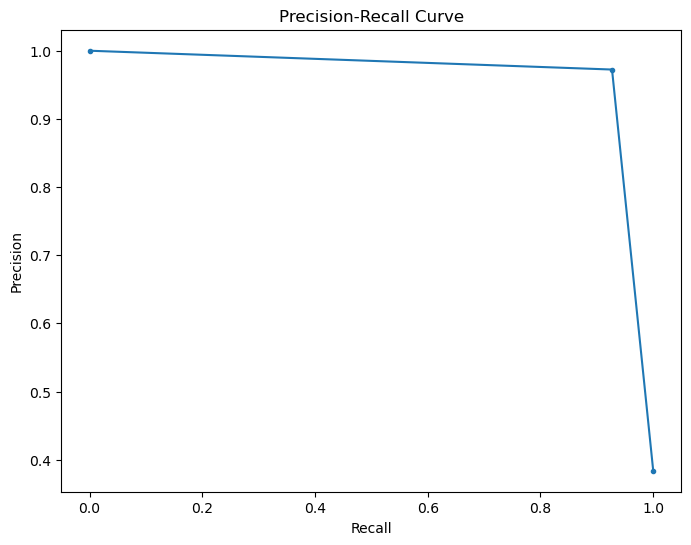

In [125]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, _ = precision_recall_curve(y, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

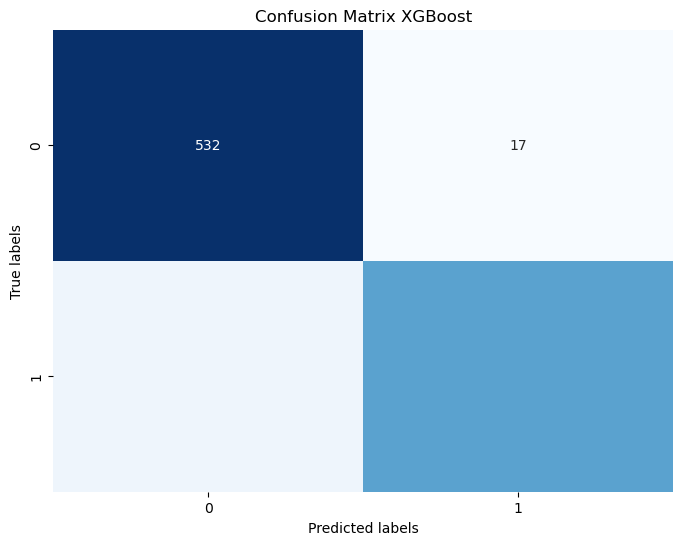

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix XGBoost')
plt.show()

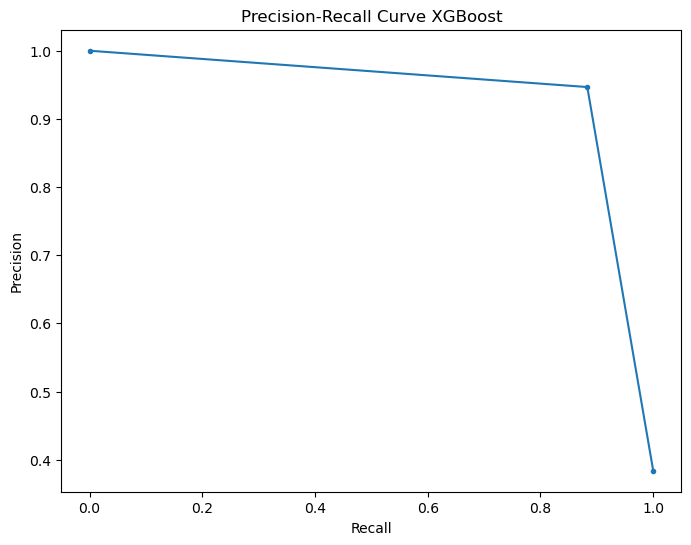

In [128]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, _ = precision_recall_curve(y, y_pred1)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve XGBoost')
plt.show()

##### Confusion Matrix: Analyze where each algorithm makes errors (e.g., misclassifying minority class instances as majority class or vice versa).

##### ROC Curve and AUC: Compare algorithms based on their ability to trade off true positive rate and false positive rate.

##### By systematically visualizing and interpreting the results using these techniques, you can gain insights into how each algorithm performs with imbalanced data and make informed decisions on which approach to proceed with for your specific problem